In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './'

In [3]:
train_feature = pd.read_csv(path + 'train_features.csv')
train_feature.head(2)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [4]:
train_targets_scored = pd.read_csv(path + 'train_targets_scored.csv')
print(train_targets_scored.shape)
train_targets_scored.head(2)

(23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_targets_nonscored = pd.read_csv(path + 'train_targets_nonscored.csv')
train_targets_nonscored.head(2)

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sample_submission = pd.read_csv(path + 'sample_submission.csv')
sample_submission.head(2)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
test_features = pd.read_csv(path + 'test_features.csv')
test_features.head(2)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.143,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.151,-0.775
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.031,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.381,-0.730


In [12]:
train_feature.drop(['sig_id','cp_type','cp_time','cp_dose'],axis=1, inplace = True)

In [13]:
train_targets_scored.drop(['sig_id'],axis=1,inplace=True)

In [15]:
X = train_feature.values
y = train_targets_scored.values

In [11]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras import utils

In [16]:
model = Sequential()

model.add(Dense(1024, input_dim = X.shape[1]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(y.shape[1]))
model.add(Activation('sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              893952    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [19]:
from tensorflow.keras import optimizers
optimizer = optimizers.Adam(learning_rate=5e-4)

In [20]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X, y, batch_size=32, epochs=30)

Epoch 1/30
745/745 [==============================] - 19s 25ms/step - loss: 0.2564 - accuracy: 0.0178
Epoch 2/30
745/745 [==============================] - 18s 24ms/step - loss: 0.0235 - accuracy: 0.0390
Epoch 3/30
745/745 [==============================] - 18s 25ms/step - loss: 0.0206 - accuracy: 0.0515
Epoch 4/30
745/745 [==============================] - 19s 25ms/step - loss: 0.0193 - accuracy: 0.0734
Epoch 5/30
745/745 [==============================] - 16s 21ms/step - loss: 0.0183 - accuracy: 0.0887
Epoch 6/30
745/745 [==============================] - 17s 22ms/step - loss: 0.0176 - accuracy: 0.0991
Epoch 7/30
745/745 [==============================] - 16s 21ms/step - loss: 0.0170 - accuracy: 0.1072
Epoch 8/30
745/745 [==============================] - 20s 26ms/step - loss: 0.0166 - accuracy: 0.1111
Epoch 9/30
745/745 [==============================] - 18s 25ms/step - loss: 0.0162 - accuracy: 0.1180
Epoch 10/30
745/745 [==============================] - 19s 25ms/step - loss: 0.015

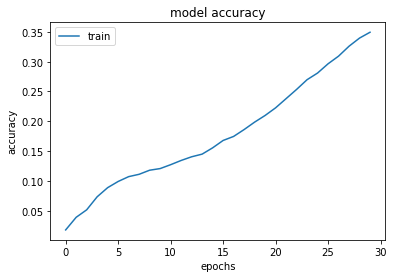

In [26]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
columns = sample_submission.columns

In [28]:
submission_test = pd.DataFrame(columns=columns)
submission_test.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor


In [29]:
submission_test['sig_id'] = test_features['sig_id']

In [30]:
test_features.drop(['sig_id','cp_type','cp_time','cp_dose'],axis=1,inplace=True)

In [31]:
X_test = test_features.values

In [32]:
y_test = model.predict(X_test)

In [33]:
submission_test.iloc[:,1:] = y_test

In [ ]:
#submission_test.to_csv('submission.csv',index=False)

In [34]:
submission_test.head(2)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,2.42558e-06,3.57831e-05,0.000114737,0.00103009,0.00330961,0.00400633,2.1977e-05,0.00103116,2.40107e-08,...,1.55091e-07,0.00199953,0.0022656,6.34933e-05,2.78062e-06,0.000107078,1.68414e-07,3.8722e-05,4.01486e-05,4.30661e-05
1,id_001897cda,2.73013e-06,4.64643e-06,0.000106476,9.70863e-06,4.92109e-05,5.17199e-05,0.000373751,0.00447771,5.07647e-06,...,2.47352e-05,1.57324e-05,4.1379e-05,1.15496e-06,0.000526845,5.21905e-05,0.000489086,5.03439e-05,3.59719e-05,2.88523e-05
